# WIDS 2020 Datathon
#### San Jose State University Team - Sonia Meyer, Emma Hendry


The following cells import modules, read data from csv files, and provide an overview of data.

In [0]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier ,AdaBoostClassifier
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

In [0]:
training_data = pd.read_csv("training_v2.csv")
training_data.shape

(91713, 186)

In [0]:
unlabeled_data = pd.read_csv("unlabeled.csv")
unlabeled_data.shape

(39308, 186)

In [0]:
data_dict = pd.read_csv("WiDS Datathon 2020 Dictionary.csv")
training_data.shape

(91713, 186)

In [0]:
training_data.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [0]:
training_data.describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,...,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,65606.079280,65537.131464,105.669262,0.086302,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,...,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,37795.088538,37811.252183,62.854406,0.280811,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,...,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169
min,1.000000,1.000000,2.000000,0.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32852.000000,32830.000000,47.000000,0.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65665.000000,65413.000000,109.000000,0.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,...,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98342.000000,98298.000000,161.000000,0.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,...,0.130000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,131051.000000,204.000000,1.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,...,0.990000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The following cells handle columns with missing values. The threshold is set to 75%. It removes these columns as well as zero importance data like IDs.

In [0]:
#handling missing values - drop columns with more than 75% values missing

missing_values = training_data.notna()
column_headers = []
column_percentage = []

#create two lists, one of column headers, one of not null percentages
for column in missing_values:
    column_headers.append(column)
    column_contents = missing_values[column].values
    not_na_percentage = round(sum(column_contents)/len(column_contents),2)
    column_percentage.append(not_na_percentage)

#create dict of two lists
missing_dict = dict(zip(column_headers, column_percentage))

#create list of values less than 0.75
remove_columns = []
for key, value in missing_dict.items():
    if value <= 0.75:
        remove_columns.append(key)

In [0]:
ignore_variables = ['readmission_status','encounter_id', 'patient_id',
                   'icu_id','hospital_id', 'apache_4a_hospital_death_prob', 
                    'apache_4a_icu_death_prob']
ignore_variables.extend(remove_columns)

print('number of columns to be removed:', len(ignore_variables))

number of columns to be removed: 81


In [0]:
for variable in ignore_variables:
    training_data.drop(variable, axis=1, inplace=True)

In [0]:
training_data.shape

(91713, 105)

In [0]:
counts = training_data.count()
counts.sort_values(ascending=True).head(20)
#confirms missing values variables are removed

wbc_apache               69701
h1_temp_max              69981
h1_temp_min              69981
hospital_admit_source    70304
hematocrit_apache        71835
bun_apache               72451
creatinine_apache        72860
sodium_apache            73113
d1_hco3_min              76642
d1_hco3_max              76642
d1_platelets_min         78269
d1_platelets_max         78269
d1_wbc_min               78539
d1_wbc_max               78539
d1_calcium_max           78644
d1_calcium_min           78644
d1_hemaglobin_max        79566
d1_hemaglobin_min        79566
d1_hematocrit_max        80059
d1_hematocrit_min        80059
dtype: int64

The following cells remove colinear variables.

In [0]:
# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = training_data.corr().abs()
corr_matrix.head()

,hospital_death,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,d1_wbc_max,d1_wbc_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
hospital_death,1.000000,0.111017,0.031247,0.093574,0.019526,0.063316,0.038362,0.089862,0.090715,0.083674,...,0.143862,0.121420,0.004403,0.039453,0.015784,0.038864,0.043973,0.029788,0.018722,0.051105
age,0.111017,1.000000,0.087077,0.067320,0.109937,0.049872,0.127252,0.022914,0.056060,0.059246,...,0.003009,0.001538,0.029477,0.028065,0.077908,0.020061,0.025007,0.030310,0.023335,0.025924
bmi,0.031247,0.087077,1.000000,0.015921,0.056316,0.001531,0.877339,0.026047,0.006514,0.015420,...,0.024323,0.023523,0.020434,0.002377,0.172943,0.001855,0.031144,0.013375,0.010017,0.043380
elective_surgery,0.093574,0.067320,0.015921,1.000000,0.023620,0.133704,0.026900,0.367040,0.775025,0.908247,...,0.098373,0.040979,0.006229,0.031512,0.001645,0.034700,0.014695,0.017587,0.008215,0.015369
height,0.019526,0.109937,0.056316,0.023620,1.000000,0.008075,0.391967,0.001630,0.015268,0.025276,...,0.012780,0.017753,0.009290,0.012043,0.000980,0.010481,0.000530,0.001718,0.008370,0.004921


In [0]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,hospital_death,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,d1_wbc_max,d1_wbc_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
hospital_death,NaN,0.111017,0.031247,0.093574,0.019526,0.063316,0.038362,0.089862,0.090715,0.083674,...,0.143862,0.121420,0.004403,0.039453,0.015784,0.038864,0.043973,0.029788,0.018722,0.051105
age,NaN,NaN,0.087077,0.067320,0.109937,0.049872,0.127252,0.022914,0.056060,0.059246,...,0.003009,0.001538,0.029477,0.028065,0.077908,0.020061,0.025007,0.030310,0.023335,0.025924
bmi,NaN,NaN,NaN,0.015921,0.056316,0.001531,0.877339,0.026047,0.006514,0.015420,...,0.024323,0.023523,0.020434,0.002377,0.172943,0.001855,0.031144,0.013375,0.010017,0.043380
elective_surgery,NaN,NaN,NaN,NaN,0.023620,0.133704,0.026900,0.367040,0.775025,0.908247,...,0.098373,0.040979,0.006229,0.031512,0.001645,0.034700,0.014695,0.017587,0.008215,0.015369
height,NaN,NaN,NaN,NaN,NaN,0.008075,0.391967,0.001630,0.015268,0.025276,...,0.012780,0.017753,0.009290,0.012043,0.000980,0.010481,0.000530,0.001718,0.008370,0.004921


In [0]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('There are %d columns to remove.' % (len(to_drop)))
#Drop the columns with high correlations
training_data = training_data.drop(columns = to_drop)

There are 25 columns to remove.


In [0]:
training_data.shape

(91713, 80)

The follow cells show the top 20 most correlated variables and their dictionary descriptions. A select few variables are selected for the model to train on. These variables are imputed with median values to prepare for training.

In [0]:
correlation = training_data.corr()
death_correlation = abs(correlation['hospital_death'])
death_correlation = death_correlation.sort_values(ascending=False)
death_correlation.head(20)

hospital_death       1.000000
gcs_motor_apache     0.282449
gcs_eyes_apache      0.260373
gcs_verbal_apache    0.241044
ventilated_apache    0.228661
d1_sysbp_min         0.210170
d1_spo2_min          0.210100
d1_temp_min          0.207239
d1_mbp_min           0.195262
bun_apache           0.181435
d1_diasbp_min        0.179559
intubated_apache     0.173139
d1_hco3_min          0.163213
d1_heartrate_max     0.162934
temp_apache          0.158634
h1_sysbp_min         0.146440
h1_mbp_min           0.141619
wbc_apache           0.134265
d1_calcium_min       0.130456
d1_hco3_max          0.126455
Name: hospital_death, dtype: float64

In [0]:
#top 20
top_20 = [death_correlation.index[i] for i in range(1,21)]
print(top_20)

#top 20 dictionary description
pd.set_option('display.max_colwidth', -1)
top_20 = data_dict[data_dict['Variable Name'].isin(top_20)]
to_drop_2 = ['Unit of Measure','Data Type','Example']
top_20 = top_20.drop(columns = to_drop_2)
top_20

['gcs_motor_apache', 'gcs_eyes_apache', 'gcs_verbal_apache', 'ventilated_apache', 'd1_sysbp_min', 'd1_spo2_min', 'd1_temp_min', 'd1_mbp_min', 'bun_apache', 'd1_diasbp_min', 'intubated_apache', 'd1_hco3_min', 'd1_heartrate_max', 'temp_apache', 'h1_sysbp_min', 'h1_mbp_min', 'wbc_apache', 'd1_calcium_min', 'd1_hco3_max', 'h1_diasbp_min']


,Category,Variable Name,Description
25,APACHE covariate,bun_apache,The blood urea nitrogen concentration measured during the first 24 hours which results in the highest APACHE III score
28,APACHE covariate,gcs_eyes_apache,The eye opening component of the Glasgow Coma Scale measured during the first 24 hours which results in the highest APACHE III score
29,APACHE covariate,gcs_motor_apache,The motor component of the Glasgow Coma Scale measured during the first 24 hours which results in the highest APACHE III score
31,APACHE covariate,gcs_verbal_apache,The verbal component of the Glasgow Coma Scale measured during the first 24 hours which results in the highest APACHE III score
35,APACHE covariate,intubated_apache,Whether the patient was intubated at the time of the highest scoring arterial blood gas used in the oxygenation score
43,APACHE covariate,temp_apache,The temperature measured during the first 24 hours which results in the highest APACHE III score
45,APACHE covariate,ventilated_apache,"Whether the patient was invasively ventilated at the time of the highest scoring arterial blood gas using the oxygenation scoring algorithm, including any mode of positive pressure ventilation delivered through a circuit attached to an endo-tracheal tube or tracheostomy"
46,APACHE covariate,wbc_apache,The white blood cell count measured during the first 24 hours which results in the highest APACHE III score
50,vitals,d1_diasbp_min,"The patient's lowest diastolic blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured"
53,vitals,d1_heartrate_max,The patient's highest heart rate during the first 24 hours of their unit stay


Glasgow Coma Scale: gcs_eye_apache, gcs_motor_apache, gcs_verbal_apache
--are all part of the GCS, probably only need to analyze one variable
Intubation: intubated_apache
Temperature: temp_apache, d1_temp_min
Various Blood Concentrations: bun_apache, ventilated_apache, d1_spo2_min, d1_calcium_min, wbc_apache, d1_hco3_max, d1_hco3_min
Bloog Pressure: d1_diasbp_min, d1_heartrate_max, d1_mbp_min, d1_sysbp_min, h1_diasbp_min, h1_sysbp_min

Selected Variable: gcs_eyes_apache, intubated_apache, temp_apache, wbc_apache, d1_spo2_min d1_diasbp_min, d1_heartrate_max

In [0]:
selected_variables = ['gcs_eyes_apache', 'intubated_apache', 'temp_apache', 'wbc_apache', 
                   'd1_spo2_min', 'd1_diasbp_min', 'd1_heartrate_max']

#select variables dictionary description
selected_desc = data_dict[data_dict['Variable Name'].isin(selected_variables)]
selected_desc

#all variables are binary or numeric

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
28,APACHE covariate,gcs_eyes_apache,None,integer,The eye opening component of the Glasgow Coma Scale measured during the first 24 hours which results in the highest APACHE III score,4
35,APACHE covariate,intubated_apache,None,binary,Whether the patient was intubated at the time of the highest scoring arterial blood gas used in the oxygenation score,0
43,APACHE covariate,temp_apache,Degrees Celsius,numeric,The temperature measured during the first 24 hours which results in the highest APACHE III score,33
46,APACHE covariate,wbc_apache,10^9/L,numeric,The white blood cell count measured during the first 24 hours which results in the highest APACHE III score,10
50,vitals,d1_diasbp_min,Millimetres of mercury,numeric,"The patient's lowest diastolic blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured",60
53,vitals,d1_heartrate_max,Beats per minute,numeric,The patient's highest heart rate during the first 24 hours of their unit stay,75
64,vitals,d1_spo2_min,Percentage,numeric,The patient's lowest peripheral oxygen saturation during the first 24 hours of their unit stay,100


In [0]:
#creates dataframe with null values (np.nan) imputed with median
impute_df = training_data[selected_variables]
for variable in selected_variables:
    median_variable = impute_df[variable].median()
    impute_df[variable].fillna(median_variable, inplace=True)

impute_df.isna().sum()
#checks there are no more null values

/Users/Sonia/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



gcs_eyes_apache     0
intubated_apache    0
temp_apache         0
wbc_apache          0
d1_spo2_min         0
d1_diasbp_min       0
d1_heartrate_max    0
dtype: int64

The following cells create the training model.

In [0]:
lr = LogisticRegression()
columns = selected_variables
all_X = impute_df[columns]
all_y = training_data['hospital_death']

lr.fit(all_X, all_y)

/Users/Sonia/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size=0.2,random_state=0)
train_X.shape

(73370, 7)

In [0]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)
print("deaths prediction: {:.2f}%".format((sum(predictions)/len(predictions)*100)))

/Users/Sonia/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



deaths prediction: 1.78%


In [0]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
print("model accuracy: {:.2f}%".format(accuracy*100))

/Users/Sonia/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



model accuracy: 91.46%


In [0]:
conf_matrix = confusion_matrix(test_y, predictions)
pd.DataFrame(conf_matrix, columns=['Survived_True', 'Died_True'], index=[['Survived_Predicted', 'Died_Predicted']])

,Survived_True,Died_True
Survived_Predicted,16561,111
Died_Predicted,1456,215


The following cell runs the trained model 10 times and averages the output accuracy.

In [0]:
lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)
print(scores)
np.mean(scores)

/Users/Sonia/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/Sonia/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/Sonia/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/Sonia/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/Sonia/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22

[0.92106411 0.91877453 0.92171827 0.91833842 0.92095508 0.91876567
 0.91822048 0.91702104 0.91592148 0.91712105]


0.918790014089147

/Users/Sonia/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



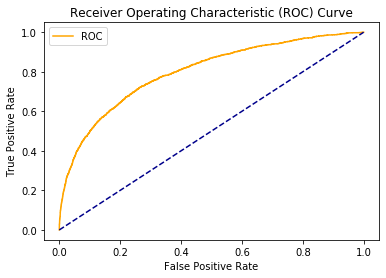

AUC-ROC : 0.7984508512033779


In [0]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
lr.fit(train_X, train_y)
probs = lr.predict_proba(test_X)
probs = probs[:, 1]
auc = roc_auc_score(test_y, probs)
fpr, tpr, thresholds = roc_curve(test_y, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",auc)

The following cell prepares the test data by imputing null values with the median value.

In [0]:
#processing unlabeled data and imputing median values in selected variables
holdout = unlabeled_data
holdout.head(5)

impute_holdout = unlabeled_data[selected_variables]
for variable in selected_variables:
    median_variable = impute_holdout[variable].median()
    impute_holdout[variable].fillna(median_variable, inplace=True)

impute_holdout.isna().sum()
#checks there are no more null values

/Users/Sonia/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



gcs_eyes_apache     0
intubated_apache    0
temp_apache         0
wbc_apache          0
d1_spo2_min         0
d1_diasbp_min       0
d1_heartrate_max    0
dtype: int64

In [0]:
lr = LogisticRegression()
lr.fit(all_X, all_y)
holdout_predictions = lr.predict(impute_holdout[columns])
print("deaths prediction: {:.2f}%".format((sum(holdout_predictions)/len(holdout)*100)))

/Users/Sonia/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



deaths prediction: 1.69%


The cell above runs the trained model on the test set and the cell below write it to a .csv file.

In [0]:
impute_holdout1 = impute_holdout.copy()
probstest = lr.predict_proba(impute_holdout1)
probstest = probstest[:, 1]
holdout1 = holdout.copy()
holdout1["hospital_death"] = probstest

submission = holdout1[["encounter_id","hospital_death"]]
submission.to_csv('sjsu_wids_solutions.csv', index=False)
submission.head()

,encounter_id,hospital_death
0,2,0.068022
1,5,0.041928
2,7,0.115114
3,8,0.067104
4,10,0.275193
